In [3]:
import pandas as pd
import seaborn as sns # data load
import matplotlib.pyplot as plt # data visualization

# Missing Value Detection & Treatment

- 결측치(Missing Value) : 데이터 수집 과정에서 측정되지 않거나 누락된 데이터를 말한다. <br>

1. 결측 데이터 확인

2. 결측치가 아닌 데이터 확인

3. 결측 데이터 채우기

4. 결측 데이터 제거하기

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info() # 칼럼 정보 보기 
               # non-null count의 경우 '누락이 아닌' 데이터의 개수를 보여준다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.isnull() # missing values 찾는 boolean index
                 # missing value 일 경우 True 반환

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titanic.isnull().sum() # 각 칼럼 missing values 갯수 보기

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

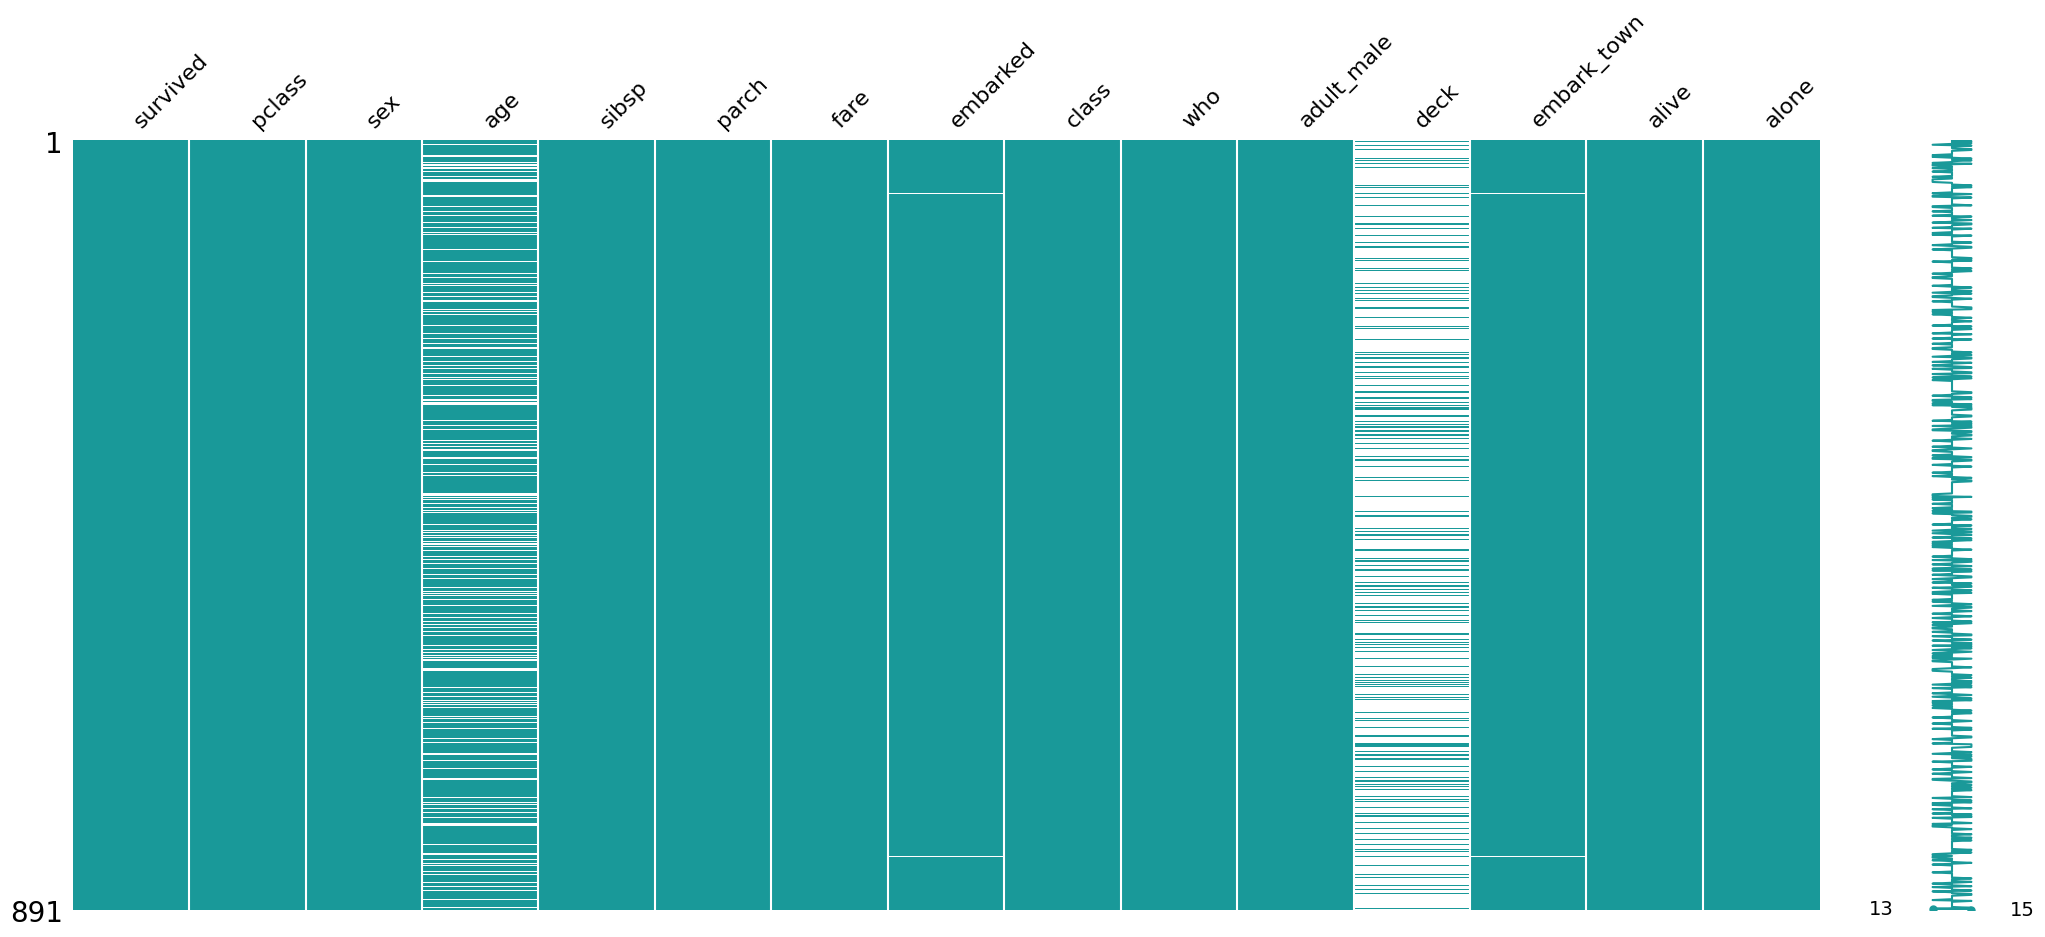

In [8]:
# deck, age 칼럼에 missing values 많은 것 확인

import missingno as msno # missing values 그래프로 확인하기 위해 missingno 호출

msno.matrix(titanic, color = (0.1, 0.6, 0.6))
plt.show()

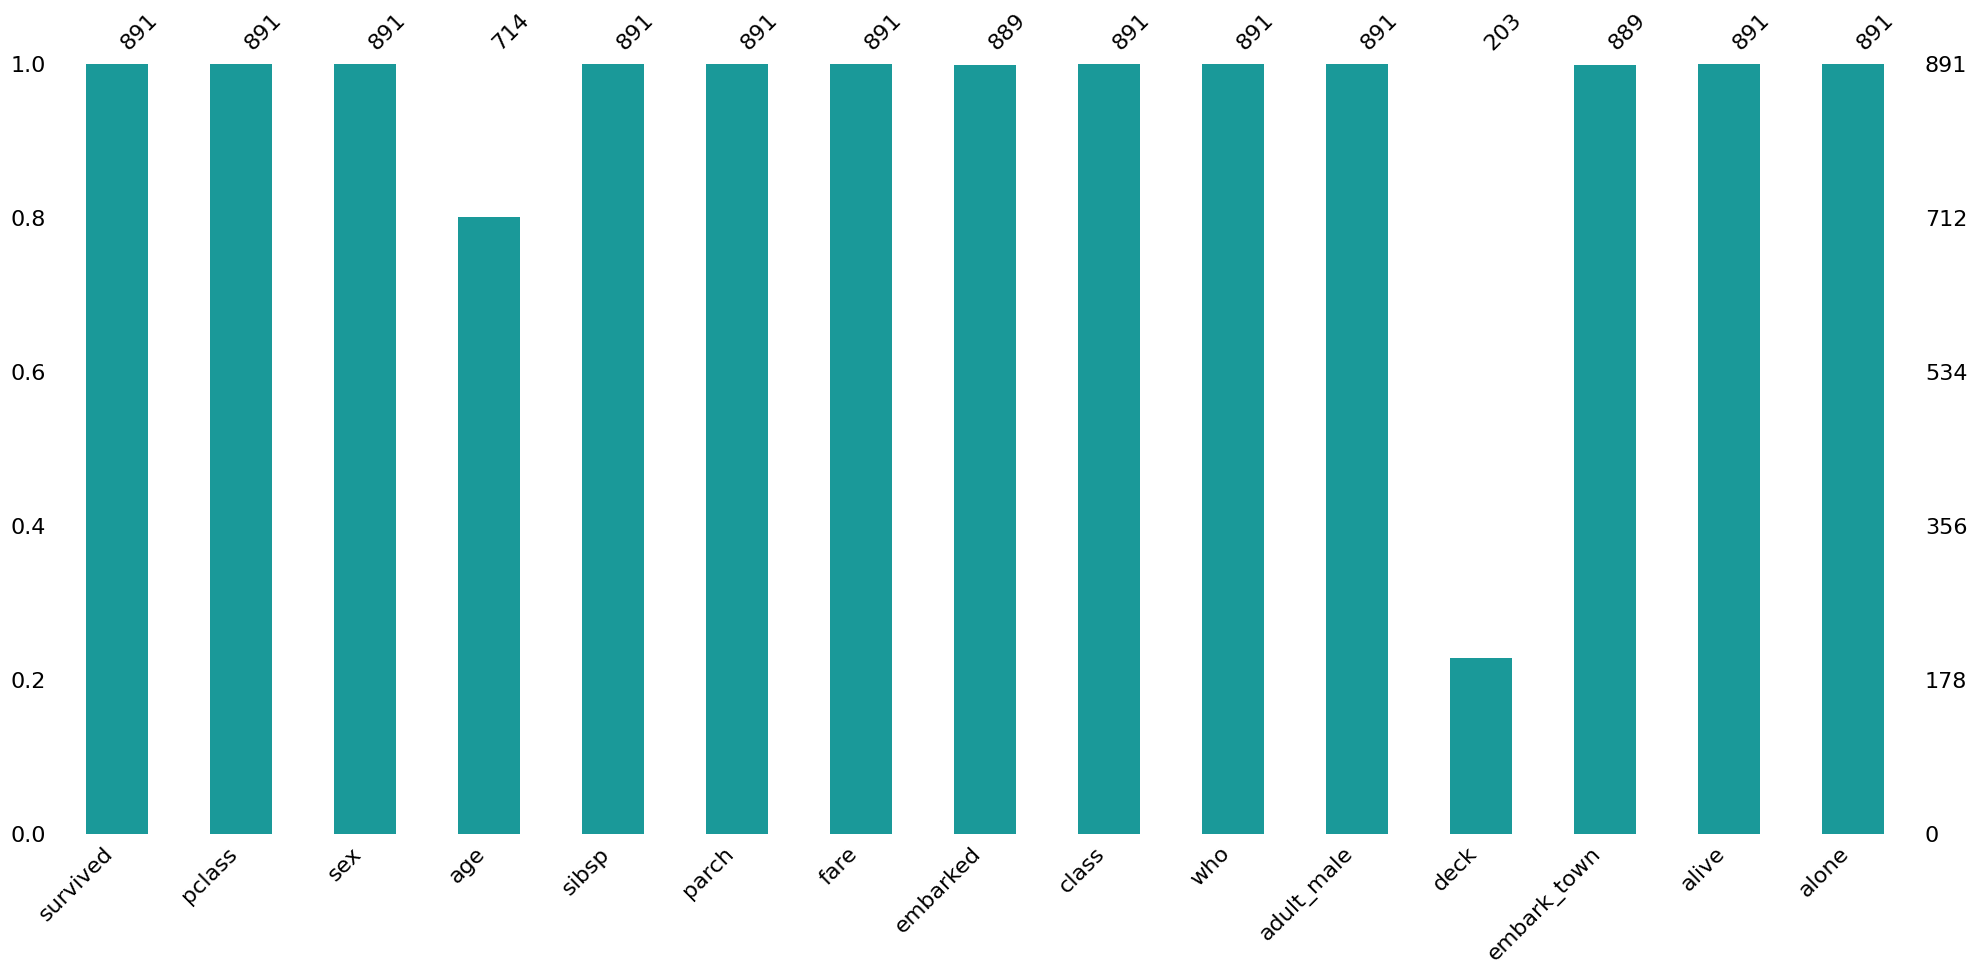

In [9]:
msno.bar(titanic, color = (0.1, 0.6, 0.6))
plt.show() # bar 그래프로 missing values 확인하기

### Missing Values Cleaning
- **전체 데이터 절반 이상의 결측치를 가진 '칼럼' 삭제하기**

In [10]:
# deck에 missing values 짱 많은 거 확인

titanic = titanic.dropna(thresh = int(len(titanic)/2), axis = 1)
            # dropna() method: missing value 제거하는 기능
            # titanic 데이터 갯수의 절반 이하 만큼의 missing values 존재한다면
            # axis = 1 'column (열)' 기준으로, 그 '열' 삭제하겠다 (axis = 0 'row (행)' 기준이면 그 '행' 삭제하겠다.)

In [11]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
titanic.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
embark_town    889
alive          891
alone          891
dtype: int64

- **특정 칼럼에서 결측치를 가지는 'row (행)' 삭제하기**

In [16]:
titanic = titanic[titanic.embarked.notnull()] # embarked 칼럼에서 missing values 가진 애들 (2 rows) 뺄게요..
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [17]:
titanic.isnull().sum() # missing values 처리한 현황 (?) 확인하기

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

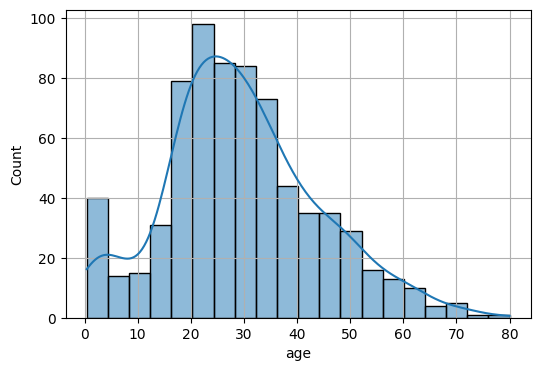

In [23]:
# age 칼럼에 결측치 177개 있다.
# 그래프로 age 칼럼 확인
plt.figure(figsize=(6, 4)) 
# sns.distplot(titanic['age'])
sns.histplot(titanic['age'], kde = True)
plt.grid()
plt.show()

- **결측치에 값 채워넣어주기**

In [32]:
titanic.tail() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


#### 결측치가 있는 자리에 일괄적으로 값 적용해주기
* ```df['column'].fill.na()```

In [31]:
tt_fillna = titanic.copy()
tt_fillna.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [34]:
tt_fillna.age.fillna(700)  # missing value 자리에 숫자 700을 채웠당.
# tt_fillna.age.fillna(700).tail()

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    700.0
889     26.0
890     32.0
Name: age, Length: 889, dtype: float64

#### 평균값으로 결측치 채우기

In [40]:
tt_mean = titanic.copy()
tt_mean.age.fillna(tt_mean['age'].mean()).tail() # 평균값인 29.64... 로 결측치 채웠당.

886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: age, dtype: float64

#### 중앙값으로 결측치 채워주기

In [39]:
titanic.age.describe() # 'age' 중앙값 = 28

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [41]:
titanic.age.fillna(value = titanic.age.median(), inplace=True)
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [42]:
titanic.tail() # missing value 자리에 '나이' 중앙값인 28을 채웠당.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


### 이외 결측치 처리 방법

- 하나라도 NaN이 있는 행 삭제: ```df1.dropna(how = any/all)```
    - any: 1개 라도 NaN값이 존재시 drop
    - all: 모두 NaN값이 존재시 drop
<br><br>
- 이외에도 다양하지만 여기까지만.
    - **최빈값 대체** (주로 nominal feature/categoric feature에서 유용)
    - **XGboost, LightGBM**: ```use_missing = False```인자 첨가 시 알고리즘이 알아서 Training loss에 기반해 결측치 채움
    - **K-NN 알고리즘**: 결측치에 가장 가까운 값 (feature similarity) 적용
    - **MICE(Multivariate Imputation by Chained Equation)**: 결측치 여러번 대체해보면서 결측치의 불확실성 체크.
    - **딥러닝**: ...

# Outlier Detection & Treatment
* 이상치(Outlier) : 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값
<br>
<br>
1. IQR (Interquartile Range) with Box plots: 데이터의 IQR 값을 이용해 이상치 탐지<br><br>

2. Standard Deviation (정규분포): 데이터가 정규분포를 이룰 때, 데이터의 표준편차를 이용해 이상치 탐지
    - 3 시그마 공식
    - z-score 공식


In [44]:
import numpy as np

titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [47]:
titanic.describe() # 칼럼 'class', 'fare' 기준 이상치 제거 해보기

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3897726725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == i + 1]['fare']
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3897726725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

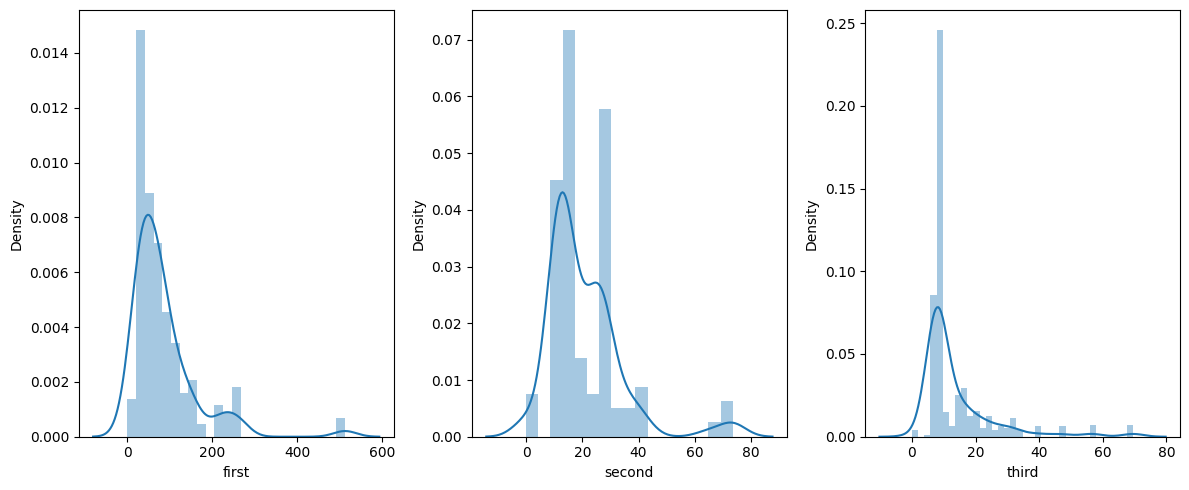

In [52]:
class_names = ['first', 'second', 'third']
# class (string type) = pclass (integer type)
plt.figure(figsize = (12, 5))
for i in range(0, 3): # 각 클래스에 대한 그래프 만들기
    plt.subplot(1, 3, i + 1) # 1 줄에 그래프 3개 그리기
    sns.distplot(titanic[titanic.pclass == i + 1]['fare']
                , axlabel = class_names[i])
plt.tight_layout()
plt.show()
    
    
    

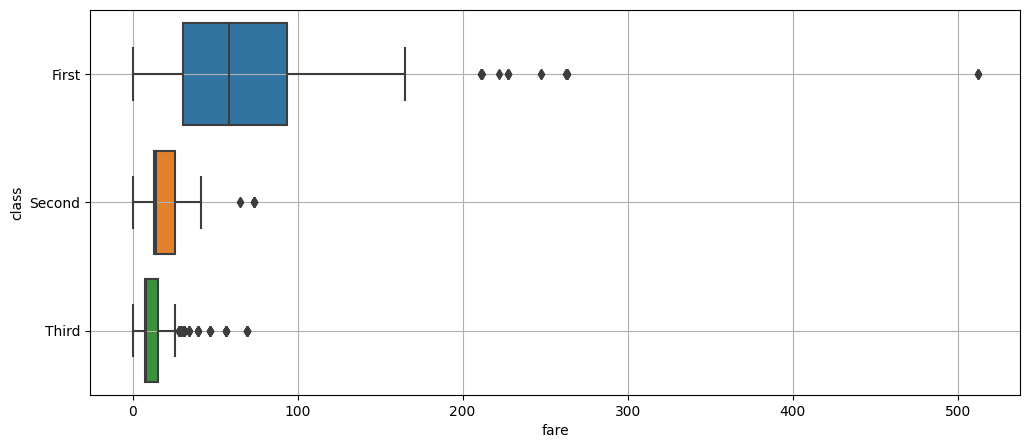

In [73]:
# 이상치 보기에는 박스 그래프가 좋은 것 같다.

plt.figure(figsize = (12, 5))
sns.boxplot(x = 'fare', y = 'class', orient = 'h', data = titanic)
# sns.catplot(x='class', y='fare', kind='swarm', data=titanic)
plt.grid()
plt.show()

### 이상치를 최댓값에 맞추기

In [75]:
# 최댓값에 맞춰서 이상치를 수정하기 위해
# fare 칼럼에 대해 높은 values 순으로 나열

pd.DataFrame(titanic.fare.sort_values(ascending = False).head(10))


,fare
258,512.3292
737,512.3292
679,512.3292
341,263.0000
27,263.0000
88,263.0000
438,263.0000
311,262.3750
742,262.3750
299,247.5208


In [78]:
tt_max = titanic.copy()
tt_max.loc[tt_max.fare > 512, 'fare'] = 263
pd.DataFrame(tt_max.fare.sort_values(ascending=False).head(10))

,fare
258,263.0000
341,263.0000
27,263.0000
737,263.0000
88,263.0000
679,263.0000
438,263.0000
311,262.3750
742,262.3750
299,247.5208


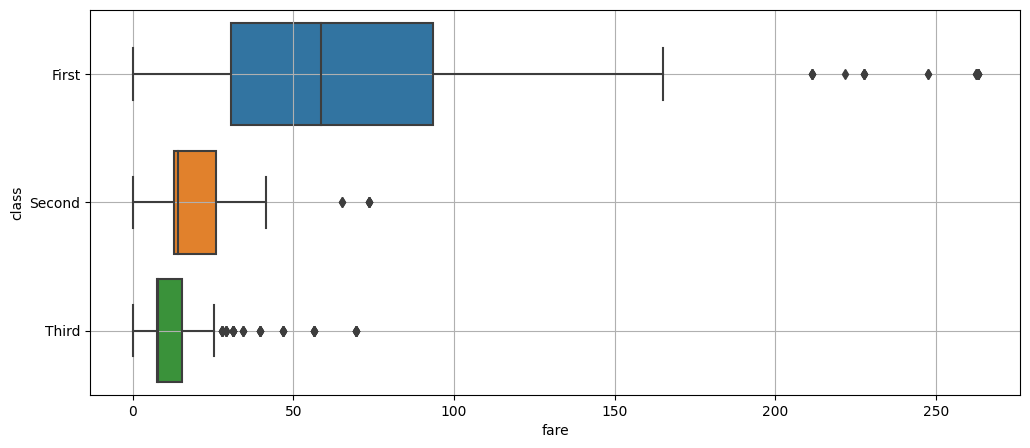

In [81]:
plt.figure(figsize=(12, 5)) 
sns.boxplot(x = 'fare', y='class', orient='h', data=tt_max)
plt.grid()
plt.show()

### IQR 이용해서 이상치 탐지: 최대/최솟값에 이상치 맞춰주기

- 최솟값: 제 1사분위(Q1)에서 1.5 IQR을 뺀 위치
- 제 1사분위(Q1) : 25%의 위치
- 제 2사분위(Q2) : 50%의 위치. 중앙값(median)
- 제 3사분위(Q3) : 75%의 위치
- 최댓값 : 제 3사분위(Q3)에서 1.5 IQR을 더한 위치
- IQR = Q3 - Q1
<br><br>

- **최솟값보다 작거나 최댓값보다 큰 데이터는 이상치로 처리**

In [84]:
titanic3 = titanic.copy()

In [94]:
def  get_bound(series):
    quartile_1, quartile_3 = np.percentile(series, [25, 75])
    # 제 1사분위, 제 3사분위 정의
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    # 최솟값 = Q1 - (IQR * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    # 최댓값 = Q3 + (IQR * 1.5)
    return lower_bound, upper_bound

class_1 = titanic3[titanic3.pclass == 1]['fare']
class_2 = titanic3[titanic3.pclass == 2]['fare']
class_3 = titanic3[titanic3.pclass == 3]['fare']
    # 각 class에 해당하는 데이터의 '요금' 칼럼으로 시리즈 구성
    

class_1_lower, class_1_upper = get_bound(class_1)
class_2_lower, class_2_upper = get_bound(class_2)
class_3_lower, class_3_upper = get_bound(class_3)
    # 각 class에 해당하는 시리즈 get_bound 함수 적용해서
    # 각 class의 최소값, 최대값 구하기

In [98]:
print(class_1_lower, class_1_upper)
print(class_2_lower, class_2_upper)
print(class_3_lower, class_3_upper)

-63.320375 187.59222499999998
-6.5 45.5
-3.875 27.125


In [99]:
titanic3.loc[(titanic3.pclass == 1) 
             & (titanic3.fare < class_1_lower)
             , 'fare'] = class_1_lower
    # titanic3 데이터프레임에서
    # first class 이면서 & 요금 값이 최솟값보다 낮은
    # 'fare' 값 위치에 class_1_lower 값을 넣겠다

titanic3.loc[(titanic3.pclass == 1) 
             & (titanic3.fare > class_1_upper)
             , 'fare'] = class_1_upper
    # titanic3 데이터프레임에서
    # first class 이면서 & 요금 값이 최댓값보다 높은
    # 'fare' 값 위치에 class_1_upper 값을 넣겠다

titanic3.loc[(titanic3.pclass == 2) 
             & (titanic3.fare < class_2_lower)
             , 'fare'] = class_2_lower
    # titanic3 데이터프레임에서
    # second class 이면서 & 요금 값이 최솟값보다 낮은
    # 'fare' 값 위치에 class_2_lower 값을 넣겠다

titanic3.loc[(titanic3.pclass == 2) 
             & (titanic3.fare > class_2_upper)
             , 'fare'] = class_2_upper
    # titanic3 데이터프레임에서
    # second class 이면서 & 요금 값이 최댓값보다 높은
    # 'fare' 값 위치에 class_2_upper 값을 넣겠다

titanic3.loc[(titanic3.pclass == 3) 
             & (titanic3.fare < class_3_lower)
             , 'fare'] = class_3_lower
    # titanic3 데이터프레임에서
    # third class 이면서 & 요금 값이 최솟값보다 낮은
    # 'fare' 값 위치에 class_3_lower 값을 넣겠다

titanic3.loc[(titanic3.pclass == 3) 
             & (titanic3.fare > class_3_upper)
             , 'fare'] = class_3_upper
    # titanic3 데이터프레임에서
    # third class 이면서 & 요금 값이 최댓값보다 높은
    # 'fare' 값 위치에 class_3_upper 값을 넣겠다

# 최대/최솟값에 이상치 맞춰줌

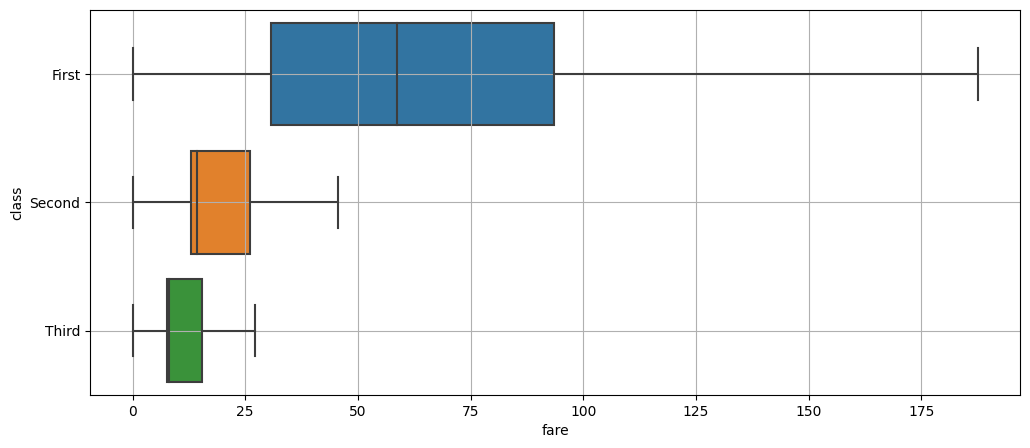

In [100]:
plt.figure(figsize=(12, 5)) 
sns.boxplot(x = 'fare', y='class', orient='h', data=titanic3)
plt.grid()
plt.show()

### 6 시그마에 이상치 맞추기

- Z-score 공식 = (x - mean) / std
- 3 표준편차만큼 벗어나는 데이터를 이상치로 처리
    - z-score가 3보다 크고 -3보다 작은 데이터를 이상치로 처리

In [87]:
titanic4 = titanic.copy()

class_1_mean = titanic4[titanic4.pclass == 1]['fare'].mean()
class_2_mean = titanic4[titanic4.pclass == 2]['fare'].mean()
class_3_mean = titanic4[titanic4.pclass == 3]['fare'].mean()
    # 각 클래스의 'fare'에 대한 데이터 프레임의 평균값 = 객체 정의 

titanic4[(titanic4.pclass == 1) 
         & (np.abs(titanic4.fare - class_1_mean) > 3 * titanic4.fare.std())]
titanic4[(titanic4.pclass == 2) 
         & (np.abs(titanic4.fare - class_2_mean) > 3 * titanic4.fare.std())]
titanic4[(titanic4.pclass == 3) 
         & (np.abs(titanic4.fare - class_3_mean) > 3 * titanic4.fare.std())]
    # 각 class에 해당하고 
    # (데이터에 표시된 요금값 - 각 클래스의 요금 평균값)의 절대값이 3 표준편차보다 크면
    # 이상치니까



    # z-score의 절댓값이 3 표준편차보다 작은 것만 데이터에 포함시킨다.
titanic4 = titanic4[~((titanic4.pclass == 1) 
                      & (np.abs(titanic4.fare - class_1_mean)
                         > 3 * titanic4.fare.std()
                        )
                     )]
titanic4 = titanic4[~((titanic4.pclass == 2) 
                      & (np.abs(titanic4.fare - class_2_mean) > 3 * titanic4.fare.std()))]
titanic4 = titanic4[~((titanic4.pclass == 3) 
                      & (np.abs(titanic4.fare - class_3_mean) > 3 * titanic4.fare.std()))]


# 6시그마에 이상치 맞춰줌

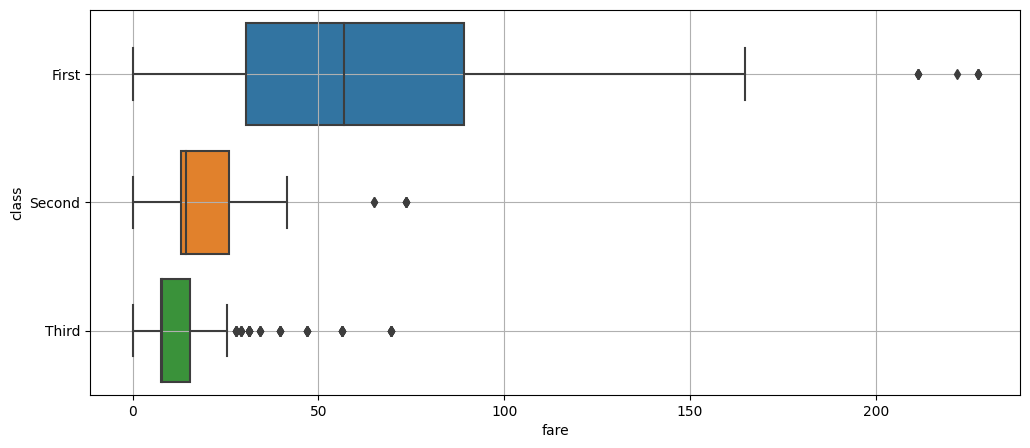

In [88]:
plt.figure(figsize=(12, 5)) 
sns.boxplot(x = 'fare', y='class', orient='h', data=titanic4)
plt.grid()
plt.show()

# Data Transformation (Skew / Kurtosis)

In [101]:
titanic.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [102]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [103]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
# 왜도, 첨도 확인?

def draw_distplot(col_name): # 각 클래스 기준 다른 특징에 대한 그래프 그리는 함수
    class_names = ['first', 'second', 'third']
    plt.figure(figsize = (12, 5))
    for i in range(0, 3):
        plt.subplot(1, 3, i + 1)
        sns.distplot(titanic[titanic.pclass == (i + 1)][col_name]
                    , axlabel = class_names[i])
    plt.tight_layout()
    plt.show()

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3655925696.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name]
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3655925696.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

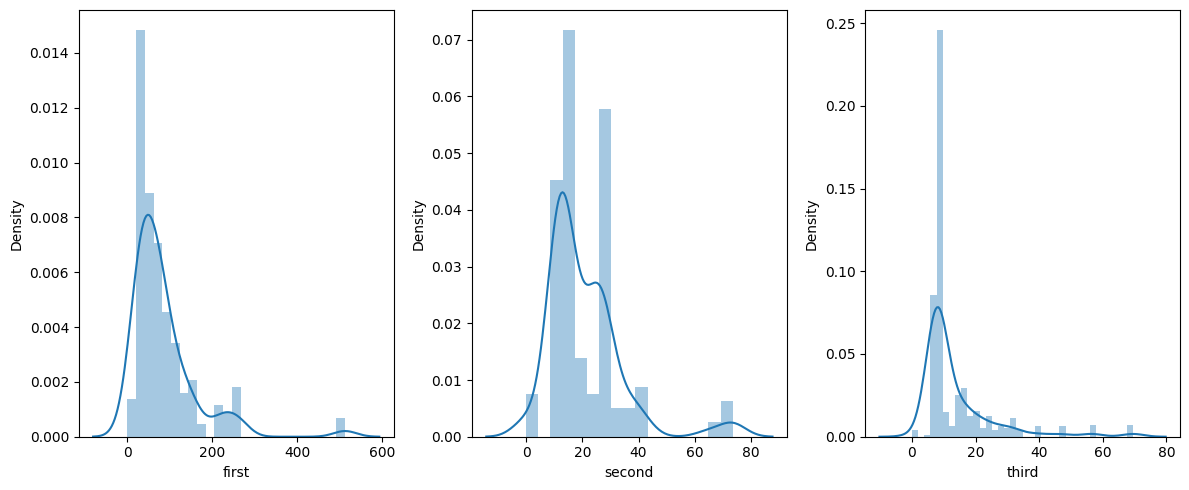

In [109]:
draw_distplot('fare')

In [110]:
print('skew: ', round(titanic.fare.skew(), 2))
    # 소수점 두번째 자리에서 왜도 값 반올림 해줘용
    # 얼마나 오른쪽/왼쪽에 치우쳐져 있는지?
print('kurtosis: ', round(titanic.fare.kurt(), 2))
    # 소수점 두번째 자리에서 첨도 값 반올림 해줘요
    # 얼마나 뾰족한지?

skew:  4.8
kurtosis:  33.51


### 로그 변환

In [112]:
from sklearn import preprocessing

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3655925696.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name]
/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/3655925696.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

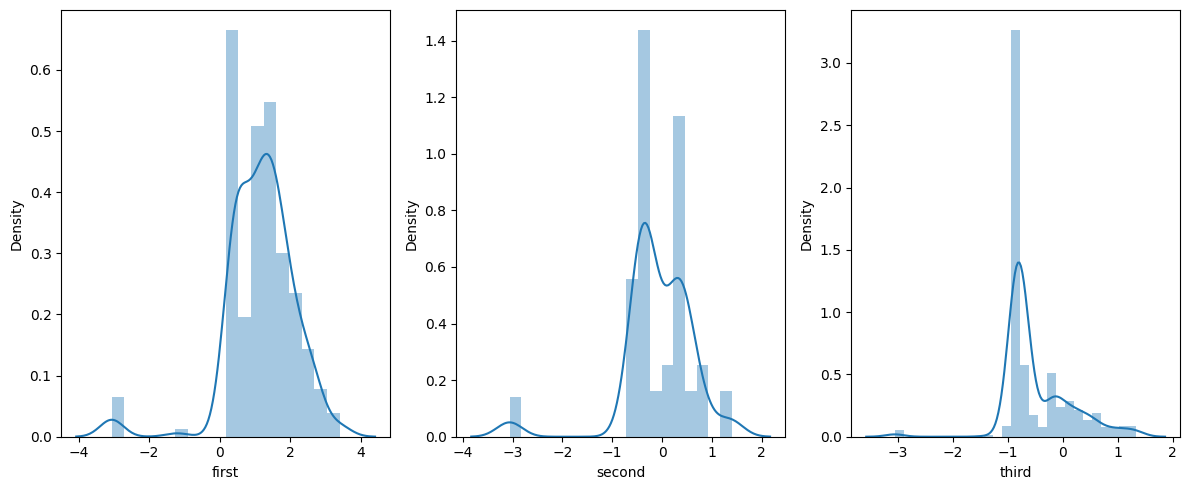

In [122]:
# '요금' 칼럼 로그 변환
# 정규성을 높이고 분석에서 정확한 값을 얻기 위함!
titanic['fare_log'] = preprocessing.scale(np.log1p(titanic.fare))
    # '요금' 칼럼 로그 변환 칼럼에 요금 값 + 1을 로그 변환한 값을 넣어주기
# titanic['fare_log'] = preprocessing.scale(np.log(titanic.fare+1))
    # np.log(titanic.fare + 1) = np.log1p(titanic.fare)
    # 오류 방지 위해 np.log1p() 사용 권장
draw_distplot('fare_log')

- 요금 칼럼 로그 변환 전 그래프가 한쪽으로 치우쳤던 걸 완화(?)시켜줌
- 한쪽으로 치우친 분포에 로그 변환을 취하면 정규분포 모양으로 고르게 분포할 수 있다.

In [121]:
print('skew : ', round(titanic.fare_log.skew(), 2))
print('kurtosis : ', round(titanic.fare_log.kurt(), 2))

skew :  0.4
kurtosis :  1.0


### Normality Test (정규성 검정)

- QQ plot: normal dist를 따를 떄, quantile value와 현재 데이터 분포 상의 quantile 값을 scattering 해주는 것.
- 일단 산점도가 직선을 따르면 정규성을 가진다고 이해하자.

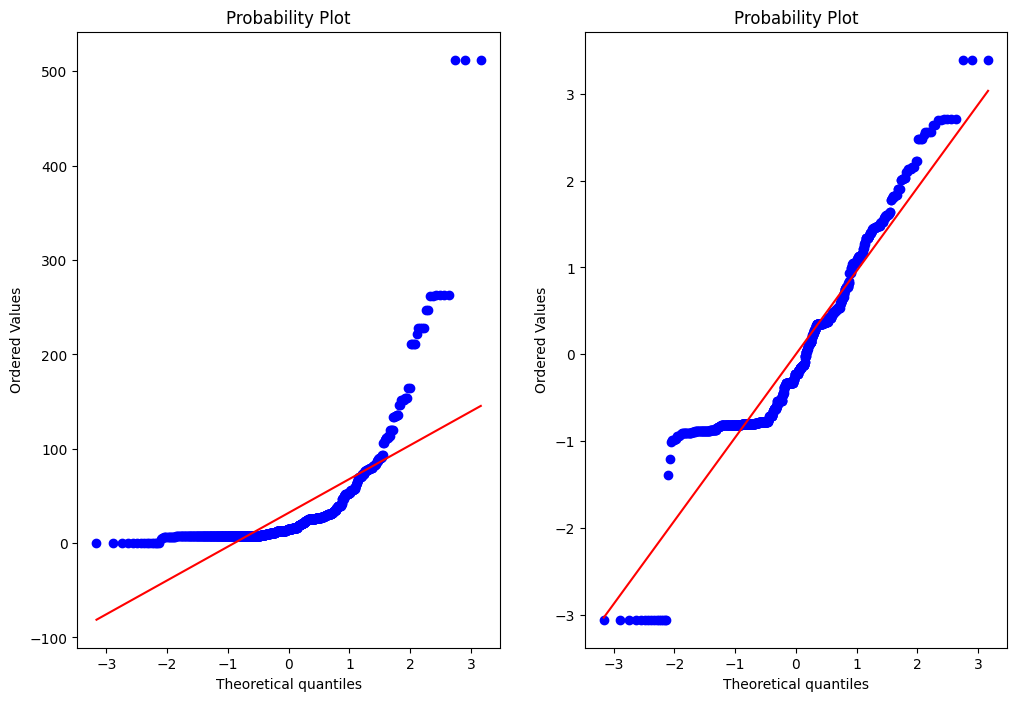

In [124]:
from scipy import stats

fig = plt.figure(figsize = (12, 8))
fig.add_subplot(1,2,1)
res = stats.probplot(titanic['fare'], plot = plt)
fig.add_subplot(1,2,2)
res = stats.probplot(titanic['fare_log'], plot = plt)
# fare 칼럼과 fare_log 칼럼에 대한 정규성 테스트 비교


- 요금 칼럼을 로그변환 해주었을 때 정규성이 높아진 것을 시각적으로 확인할 수 있다.

# Scaling

**데이터 스케일링 종류**
1. **StandardScaler**
    - mean = 0, std = 1로 조정해서 모든 특성이 같은 크기를 갖게 한다.
    <br><br>
2. **MinMaxScaler**
    - Max = 1, Min = 0으로 조정.
    - Outlier에 취약하다는 특성이 있다.
    <br><br>
3. **RobustScaler**
    - Median = 0, IQR = 1로 조정.
    - Outlier 영향을 최소화, 정규분포보다 더 넓게 분포.
    <br><br>
4. **MaxAbsScaler**
    - 0을 기준으로 절대값이 가장 큰 수 가 1이 되도록 조정.
    - 양수 데이터로만 구성된 데이터셋에서는 outlier에 민감하다는 특성이 있다.
<br><br>
<br><br>

**데이터 스케일링 이유**
- Outlier의 영향을 최소화하기 위함.
- 이상치 영향을 가장 적게 받는 StandardScaler, RobustScaler를 주로 사용함.
<br><br>
<br><br>

**Methods**
- ```fit()```: 데이터 학습시키는
- ```transform()```: 실제로 학습시킨 것을 적용하는
- ```fit_transform()```: 테스트 데이터에는 사용하면 안됨

In [125]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,fare_log
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,-2.822389e-16
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,1.000563e+00
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-3.059355e+00
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,-7.996695e-01
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,-2.286411e-01
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,5.238932e-01
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.393172e+00


In [126]:
def draw_distplot(col_name):
    plt.figure(figsize = (6, 6))
    sns.distplot(titanic[col_name])
    plt.grid()
    plt.show()

### StandardScaler()

In [127]:
from sklearn.preprocessing import StandardScaler

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/1749238878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


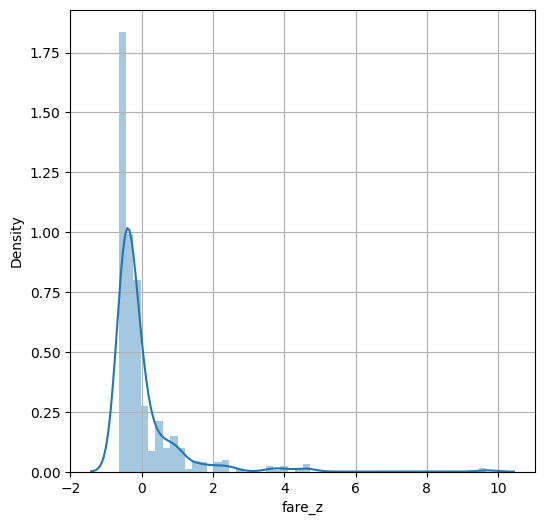

In [132]:
scaler_standard = StandardScaler() # scaler 정의
X_fare = np.array(titanic.fare).reshape(-1, 1) # 사용할 X 데이터 2차원 배열로 변환
scaler_standard.fit(X_fare) # scaler 학습
X_fare_st_scaled = scaler_standard.transform(X_fare) # 실제로 학습한 scaler 적용


titanic['fare_z'] = X_fare_st_scaled.reshape(-1,) # 실제로 학습한 scaler 적용한 값을 데이터 프레임 칼럼에 추가
draw_distplot('fare_z') # 스케일링한 칼럼으로 그래프 그리기


# 간단: 스케일러를 fit_transform 시킬거고, 그 대상은 데이터 프레임에서 뽑아낸 2차원 배열의 값이다.
# scaled_fare = StandardScaler().fit_transform(np.array(titanic.fare).reshape(-1, 1))

In [130]:
# 간단하게

# titanic['fare_z'] = StandardScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
# draw_distplot('fare_z')

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/1749238878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


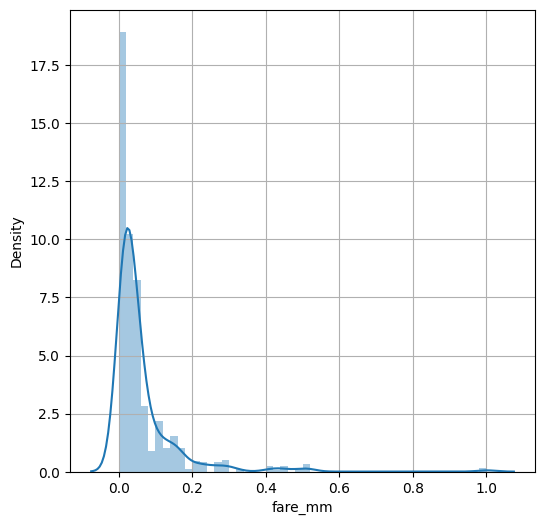

In [134]:
scaler_minmax = MinMaxScaler()
X_fare = np.array(titanic.fare).reshape(-1, 1)
scaler_minmax.fit(X_fare)
X_fare_minmax_scaled = scaler_minmax.transform(X_fare)
titanic['fare_mm'] = X_fare_minmax_scaled.reshape(-1,)

draw_distplot('fare_mm')


In [ ]:
# 간단하게

# titanic['fare_mm'] = MinMaxScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
# draw_distplot('fare_mm')

### RobustScaler()

In [ ]:
from sklearn.preprocessing import RobustScaler

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_50024/1749238878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[col_name])


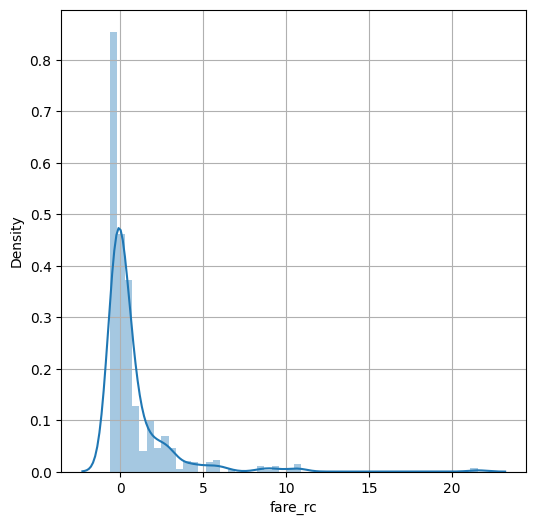

In [135]:
scaler_rc = RobustScaler() # scaler 객체 정의
X_fare = np.array(titanic.fare).reshape(-1, 1) # 사용할 X 데이터 정의
scaler_rc.fit(X_fare) # scaler 학습
X_fare_rc_scaled = scaler_rc.transform(X_fare) # transform 학습 적용
titanic['fare_rc'] = X_fare_rc_scaled.reshape(-1,) # 스케일링한 값 적용해줄 새로운 칼럼 정의
draw_distplot('fare_rc') # 그래프 그리기


In [ ]:
# 간단하게

# titanic['fare_rc'] = RobustScaler().fit_transform(np.array(titanic.fare).reshape(-1,1)).reshape(-1,)
# draw_distplot('fare_rc')